In [ ]:
pip install yfinance tensorflow

#LSTM- Long Short Term Memory

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0026
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4822e-05
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3973e-05
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3607e-05
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1690e-05
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9599e-05
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1823e-05
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1029e-05
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4248e-05
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.2604e-05
Train Loss: 1.9487542886054143e-05, Test Loss: 0.0008757306495681405
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


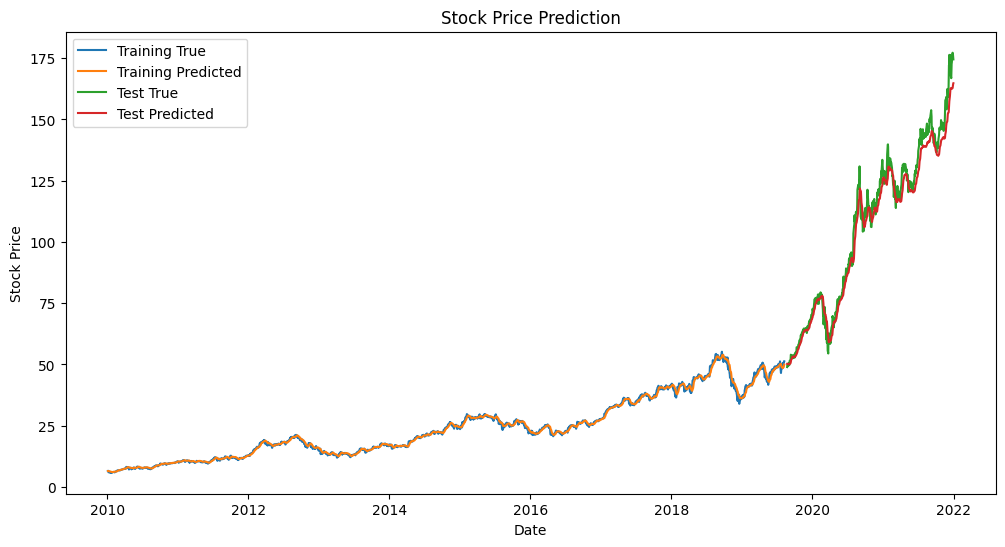

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to fetch stock price data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Function to prepare data for LSTM model
def prepare_data(data, window_size):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))
    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size])
    X, y = np.array(X), np.array(y)

    return X, y, scaler

# Function to build LSTM model
def build_model(window_size):
    model = Sequential([
        LSTM(50, input_shape=(window_size, 1)),
        Dense(1)
    ])
    return model

# Fetch stock data for a specific ticker (e.g., Apple: AAPL)
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(ticker, start_date, end_date)

# Prepare data for training
window_size = 10
X, y, scaler = prepare_data(data['Close'], window_size)

# Split data into training and testing sets
split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = build_model(window_size)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse scaling
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_train_true_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_true_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot training and test predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[:split], y_train_true_inv, label='Training True')
plt.plot(data.index[:split], y_train_pred_inv, label='Training Predicted')
plt.plot(data.index[split+window_size:], y_test_true_inv, label='Test True')
plt.plot(data.index[split+window_size:], y_test_pred_inv, label='Test Predicted')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440332,6.455078,6.391280,6.422878,493729600
2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2010-01-06,6.348847,6.477046,6.342226,6.451466,552160000
2010-01-07,6.337110,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800
...,...,...,...,...,...
2021-12-27,177.228821,177.317269,174.024889,174.044535,74919600
2021-12-28,176.206680,178.211606,175.459756,177.061729,79144300


In [ ]:
# Evaluate LSTM model
from sklearn.metrics import mean_squared_error,mean_absolute_error
train_loss_lstm = mean_squared_error(y_train_true_inv, y_train_pred_inv)
test_loss_lstm = mean_squared_error(y_test_true_inv, y_test_pred_inv)

train_rmse_lstm = np.sqrt(train_loss_lstm)
test_rmse_lstm = np.sqrt(test_loss_lstm)

train_mae_lstm = mean_absolute_error(y_train_true_inv, y_train_pred_inv)
test_mae_lstm = mean_absolute_error(y_test_true_inv, y_test_pred_inv)

In [ ]:
# Print evaluation metrics
print("LSTM Model:")
print(f"Train MSE: {train_loss_lstm}, Test MSE: {test_loss_lstm}")
print(f"Train RMSE: {train_rmse_lstm}, Test RMSE: {test_rmse_lstm}")
print(f"Train MAE: {train_mae_lstm}, Test MAE: {test_mae_lstm}")
print()

LSTM Model:
Train MSE: 0.5728339871573095, Test MSE: 25.741999567991876
Train RMSE: 0.7568579702674139, Test RMSE: 5.073657415316083
Train MAE: 0.5169136893275558, Test MAE: 3.8759370948086267



##LSTM - MULTIPLE LAYERS


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0043
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6725e-05
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8358e-05
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0982e-05
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8560e-05
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.6623e-05
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.8002e-05
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7221e-05
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9856e-05
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.9030e-05
Train Loss: 4.4182575948070735e-05, Test Loss: 0.0008586095063947141
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


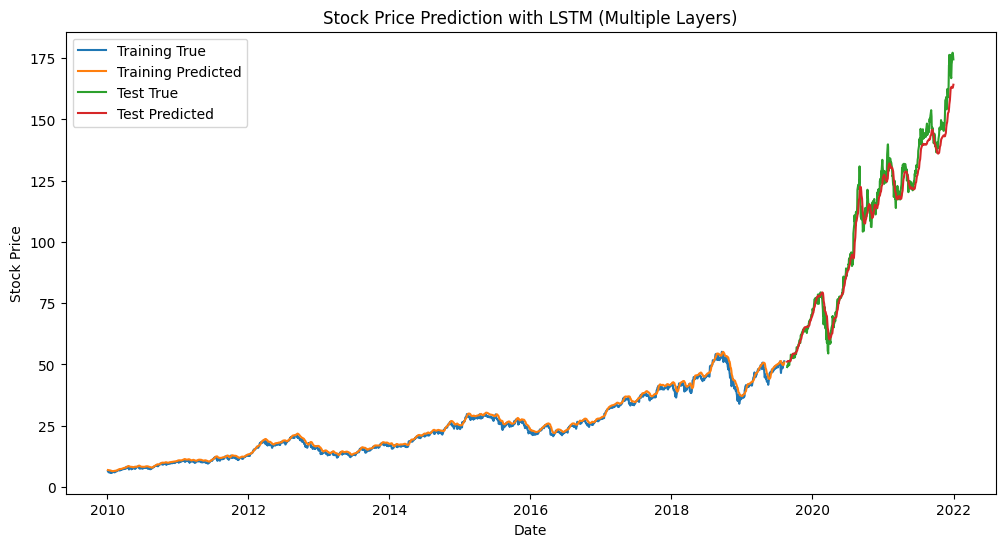

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to fetch stock price data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Function to prepare data for LSTM model
def prepare_data(data, window_size):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size])

    X, y = np.array(X), np.array(y)

    return X, y, scaler

# Function to build LSTM model with multiple layers
def build_model(window_size):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
        LSTM(50),
        Dense(1)
    ])
    return model

# Fetch stock data for a specific ticker (e.g., Apple: AAPL)
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(ticker, start_date, end_date)

# Prepare data for training
window_size = 10
X, y, scaler = prepare_data(data['Close'], window_size)

# Split data into training and testing sets
split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model with multiple layers
model = build_model(window_size)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse scaling
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_train_true_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_true_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot training and test predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[:split], y_train_true_inv, label='Training True')
plt.plot(data.index[:split], y_train_pred_inv, label='Training Predicted')
plt.plot(data.index[split+window_size:], y_test_true_inv, label='Test True')
plt.plot(data.index[split+window_size:], y_test_pred_inv, label='Test Predicted')
plt.title('Stock Price Prediction with LSTM (Multiple Layers)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


#GRU - Gated Recuurent Unit

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0023
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2523e-05
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3085e-05
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3558e-05
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2361e-05
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4533e-05
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1938e-05
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.4087e-05
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3309e-05
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0958e-05
Train Loss: 1.4588343219656963e-05, Test Loss: 0.00024153225240297616
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


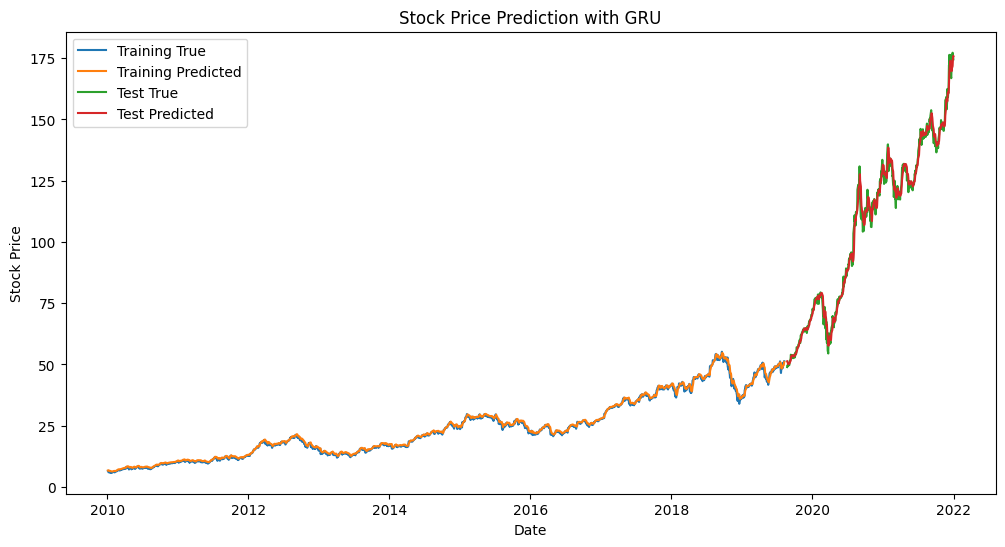

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Function to fetch stock price data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Function to prepare data for GRU model
def prepare_data(data, window_size):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size])

    X, y = np.array(X), np.array(y)

    return X, y, scaler

# Function to build GRU model
def build_model(window_size):
    model = Sequential([
        GRU(50, input_shape=(window_size, 1)),
        Dense(1)
    ])
    return model

# Fetch stock data for a specific ticker (e.g., Apple: AAPL)
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(ticker, start_date, end_date)

# Prepare data for training
window_size = 10
X, y, scaler = prepare_data(data['Close'], window_size)

# Split data into training and testing sets
split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the GRU model
model = build_model(window_size)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse scaling
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_train_true_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_true_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot training and test predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[:split], y_train_true_inv, label='Training True')
plt.plot(data.index[:split], y_train_pred_inv, label='Training Predicted')
plt.plot(data.index[split+window_size:], y_test_true_inv, label='Test True')
plt.plot(data.index[split+window_size:], y_test_pred_inv, label='Test Predicted')
plt.title('Stock Price Prediction with GRU')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# Evaluate GRU model
train_loss_gru = mean_squared_error(y_train_true_inv, y_train_pred_inv)
test_loss_gru = mean_squared_error(y_test_true_inv, y_test_pred_inv)

train_rmse_gru = np.sqrt(train_loss_gru)
test_rmse_gru = np.sqrt(test_loss_gru)

train_mae_gru = mean_absolute_error(y_train_true_inv, y_train_pred_inv)
test_mae_gru = mean_absolute_error(y_test_true_inv, y_test_pred_inv)
print("GRU Model:")
print(f"Train MSE: {train_loss_gru}, Test MSE: {test_loss_gru}")
print(f"Train RMSE: {train_rmse_gru}, Test RMSE: {test_rmse_gru}")
print(f"Train MAE: {train_mae_gru}, Test MAE: {test_mae_gru}")
print()

GRU Model:
Train MSE: 0.42882236175132715, Test MSE: 7.099810539697594
Train RMSE: 0.6548452960442849, Test RMSE: 2.6645469670654323
Train MAE: 0.4822327960405917, Test MAE: 1.9018792032193736



#RNN


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0088
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4547e-05
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6321e-05
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2392e-05
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5746e-05
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6626e-05
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2185e-05
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2231e-05
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2322e-05
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2632e-05
Train Loss: 2.0475727069424465e-05, Test Loss: 0.00040118509787134826
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


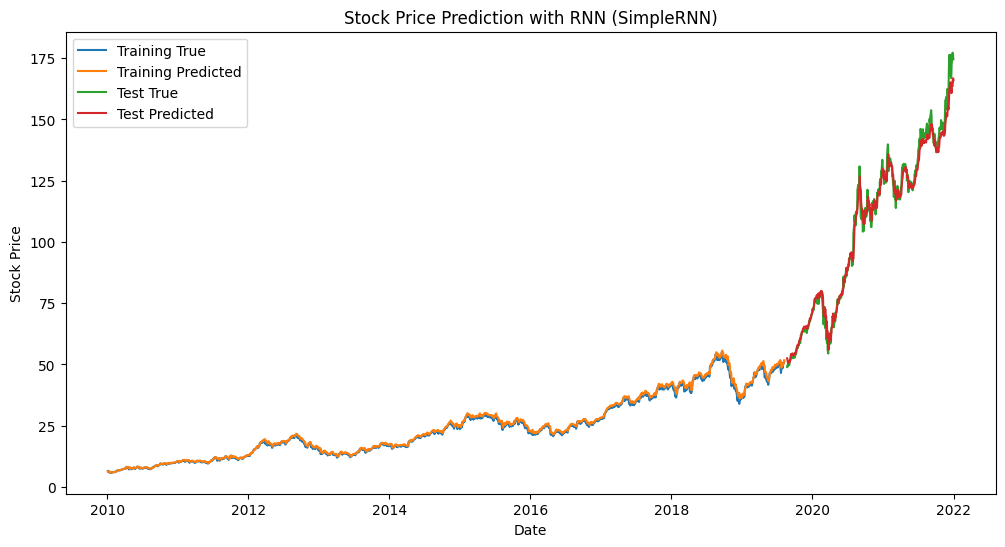

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Function to fetch stock price data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data

# Function to prepare data for RNN model
def prepare_data(data, window_size):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    X, y = [], []
    for i in range(len(scaled_data) - window_size):
        X.append(scaled_data[i:i+window_size])
        y.append(scaled_data[i+window_size])

    X, y = np.array(X), np.array(y)

    return X, y, scaler

# Function to build RNN model with multiple layers
def build_model(window_size):
    model = Sequential([
        SimpleRNN(50, return_sequences=True, input_shape=(window_size, 1)),
        SimpleRNN(50),
        Dense(1)
    ])
    return model

# Fetch stock data for a specific ticker (e.g., Apple: AAPL)
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2022-01-01'
data = fetch_stock_data(ticker, start_date, end_date)

# Prepare data for training
window_size = 10
X, y, scaler = prepare_data(data['Close'], window_size)

# Split data into training and testing sets
split = int(0.8 * len(data))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the RNN model with multiple layers
model = build_model(window_size)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss}, Test Loss: {test_loss}')

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Inverse scaling
y_train_pred_inv = scaler.inverse_transform(y_train_pred)
y_test_pred_inv = scaler.inverse_transform(y_test_pred)
y_train_true_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_true_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot training and test predictions
plt.figure(figsize=(12, 6))
plt.plot(data.index[:split], y_train_true_inv, label='Training True')
plt.plot(data.index[:split], y_train_pred_inv, label='Training Predicted')
plt.plot(data.index[split+window_size:], y_test_true_inv, label='Test True')
plt.plot(data.index[split+window_size:], y_test_pred_inv, label='Test Predicted')
plt.title('Stock Price Prediction with RNN (SimpleRNN)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# Evaluate RNN (SimpleRNN) model
train_loss_rnn = mean_squared_error(y_train_true_inv, y_train_pred_inv)
test_loss_rnn = mean_squared_error(y_test_true_inv, y_test_pred_inv)

train_rmse_rnn = np.sqrt(train_loss_rnn)
test_rmse_rnn = np.sqrt(test_loss_rnn)

train_mae_rnn = mean_absolute_error(y_train_true_inv, y_train_pred_inv)
test_mae_rnn = mean_absolute_error(y_test_true_inv, y_test_pred_inv)

In [ ]:
print("RNN (SimpleRNN) Model:")
print(f"Train MSE: {train_loss_rnn}, Test MSE: {test_loss_rnn}")
print(f"Train RMSE: {train_rmse_rnn}, Test RMSE: {test_rmse_rnn}")
print(f"Train MAE: {train_mae_rnn}, Test MAE: {test_mae_rnn}")

RNN (SimpleRNN) Model:
Train MSE: 0.6018809703428463, Test MSE: 11.79278871791852
Train RMSE: 0.7758098802817907, Test RMSE: 3.4340630043606537
Train MAE: 0.5615771560874204, Test MAE: 2.405971129601743
